# **Loading Modules And Data**

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [2]:
!pip install -U imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss, accuracy_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('punkt')
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **Data Exploration and Pre-processing**

**Loading Data**

In [4]:
df = pd.read_excel("/content/labeled_data.xlsx")

In [5]:
# Printing first 10 values
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


**As there are only few columns so no need to perform PCA**

In [6]:
print("Dataset-Shape:", df.shape)

Dataset-Shape: (24783, 7)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None


In [8]:
# Describing the Dataset
print(df.describe())

         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  


In [9]:
# Checking for Missing Values
print( df.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [10]:
# Creating new column based on class
df["class_labels"] = df["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "Neither Hate Nor Offensive"})

In [11]:
# Dropping Unnamed: 0 column as it is just index no use
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# Printing count of class_labels
class_labels_cn = df['class_labels'].value_counts()
print(class_labels_cn)

class_labels
Offensive Language            19190
Neither Hate Nor Offensive     4163
Hate Speech                    1430
Name: count, dtype: int64


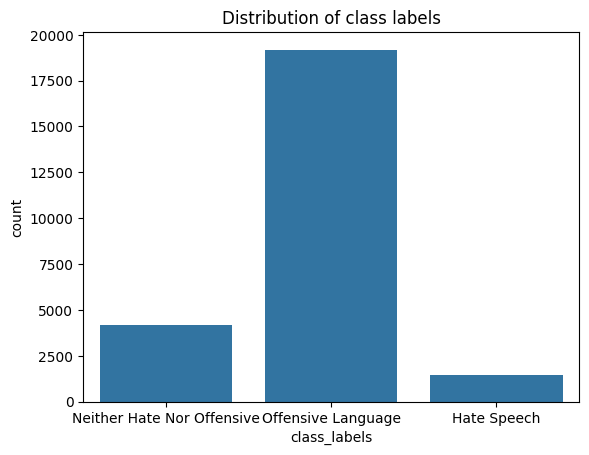

In [13]:
# Plotting the count of label values
sns.countplot(x='class_labels', data=df)
plt.title("Distribution of class labels")
plt.show()

We can observe that the data is imbalanced

In [14]:
# Creating new column text_length by counting the length of tweet
df['ln_text'] = df['tweet'].apply(lambda x: len(x.split()))

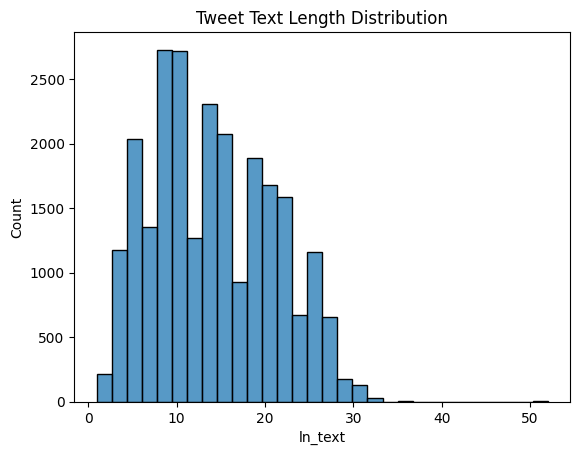

In [15]:
# Plotting text length of tweet
sns.histplot(df['ln_text'], bins=30)
plt.title("Tweet Text Length Distribution")
plt.show()

In [16]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_labels,ln_text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate Nor Offensive,25
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language,16
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language,21
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language,9
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language,26


# **Feature Engineering**

In [17]:
# Initializing stop_words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [18]:
# Removing unneccesary words/tags/symbols
def cl_text(text):
    text = text.lower()
    text = re.sub(r'^rt\s+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

In [19]:
df['tweet'] = df['tweet'].apply(cl_text)

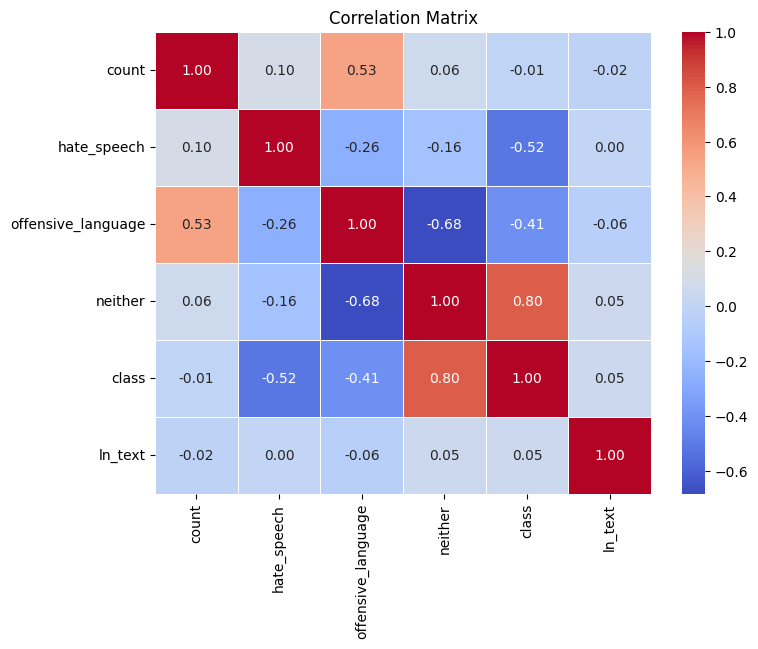

In [20]:
# Selecting only numerical columns for correlation analysis
num_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Because of not including tweet (non numeric), its not showing proper correlation.

In [21]:
df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,class_labels,ln_text
0,3,0,0,3,2,rt woman shouldnt complain cleaning house amp ...,Neither Hate Nor Offensive,25
1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe st ...,Offensive Language,16
2,3,0,3,0,1,rt dawg rt ever fuck bitch start cry confused ...,Offensive Language,21
3,3,0,2,1,1,rt look like tranny,Offensive Language,9
4,6,0,6,0,1,rt shit hear might true might faker bitch told ya,Offensive Language,26
5,3,1,2,0,1,shit blow meclaim faithful somebody still fuck...,Offensive Language,19
6,3,0,3,0,1,sit hate another bitch got much shit going,Offensive Language,20
7,3,0,3,0,1,cause im tired big bitch coming u skinny girl,Offensive Language,13
8,3,0,3,0,1,amp might get ya bitch back amp thats,Offensive Language,13
9,3,1,2,0,1,hobby include fighting mariam bitch,Offensive Language,7


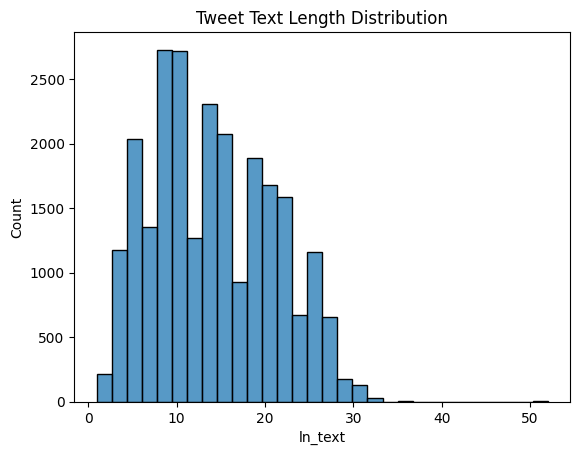

In [22]:
sns.histplot(df['ln_text'], bins=30)
plt.title("Tweet Text Length Distribution")
plt.show()

In [23]:
# Tokenizing the tweet texts
df['tweet'] = df['tweet'].apply(word_tokenize)

In [24]:
df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,class_labels,ln_text
0,3,0,0,3,2,"[rt, woman, shouldnt, complain, cleaning, hous...",Neither Hate Nor Offensive,25
1,3,0,3,0,1,"[rt, boy, dat, coldtyga, dwn, bad, cuffin, dat...",Offensive Language,16
2,3,0,3,0,1,"[rt, dawg, rt, ever, fuck, bitch, start, cry, ...",Offensive Language,21
3,3,0,2,1,1,"[rt, look, like, tranny]",Offensive Language,9
4,6,0,6,0,1,"[rt, shit, hear, might, true, might, faker, bi...",Offensive Language,26
5,3,1,2,0,1,"[shit, blow, meclaim, faithful, somebody, stil...",Offensive Language,19
6,3,0,3,0,1,"[sit, hate, another, bitch, got, much, shit, g...",Offensive Language,20
7,3,0,3,0,1,"[cause, im, tired, big, bitch, coming, u, skin...",Offensive Language,13
8,3,0,3,0,1,"[amp, might, get, ya, bitch, back, amp, thats]",Offensive Language,13
9,3,1,2,0,1,"[hobby, include, fighting, mariam, bitch]",Offensive Language,7


**Feature Selection**

By observing the data, i conclude that tweet and class are only two columns that required to detect the type of language that belongs to which class. So target variable (y) will be "class" column and independent variable (x) will be "tweet" column

In [25]:
# Vectorization of tweet column
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['tweet'])

In [26]:
print(tfidf_matrix.shape)

(24783, 8304)


In [27]:
# Extracting feature names and total scores for each feature
feature_names = vectorizer.get_feature_names_out()
tfidf_score = tfidf_matrix.sum(axis=0).A1

In [28]:
# Creating a DataFrame for the scores
tfidf_df = pd.DataFrame({'Feature': feature_names, 'Score': tfidf_score})
tfidf_df = tfidf_df.sort_values(by='Score', ascending=False).head(20)

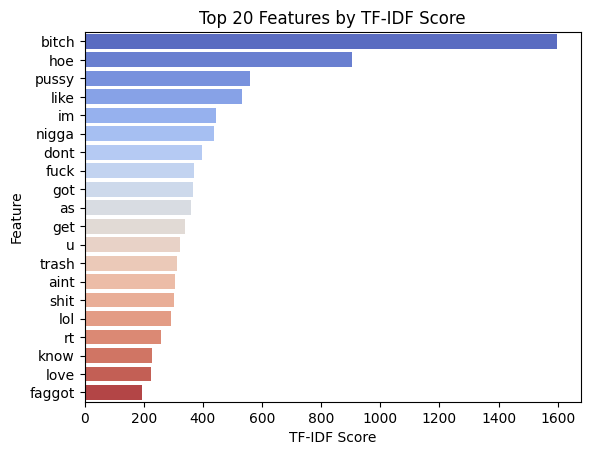

In [29]:
# Plotting the top 20 features by TF-IDF score
sns.barplot(x='Score', y='Feature', data=tfidf_df, palette='coolwarm')
plt.title("Top 20 Features by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Feature")
plt.show()


In [30]:
# Converting the TF-IDF matrix to a dense array to extract class values
tfidf_dns = tfidf_matrix.toarray()

# Creating a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_dns, columns=vectorizer.get_feature_names_out())

# Adding the class labels to the DataFrame
tfidf_df['class'] = df['class'].values

In [31]:
# Grouping by class and calculating the mean TF-IDF scores
class_tfidf = tfidf_df.groupby('class').mean()

# Getting feature names
features = class_tfidf.columns

# Converting class specific TF-IDF scores to DataFrames
# The values extracted from class_tfidf had one less value then feature. so dropping the first column of it.
ft_cl_0 = pd.DataFrame({'Feature': features, 'Score': class_tfidf.iloc[0].values})
ft_cl_1 = pd.DataFrame({'Feature': features, 'Score': class_tfidf.iloc[1].values})
ft_cl_2 = pd.DataFrame({'Feature': features, 'Score': class_tfidf.iloc[2].values})

# Sorting the features by score
ft_cl_0 = ft_cl_0.sort_values(by='Score', ascending=False).head(20)
ft_cl_1 = ft_cl_1.sort_values(by='Score', ascending=False).head(20)
ft_cl_2 = ft_cl_2.sort_values(by='Score', ascending=False).head(20)

In [32]:
# Printing top features for each class
print("Top 20 Features for Class 0 - Hate Speech:")
print(ft_cl_0)

print("\nTop 20 Features for Class 1 - Offensive Language:")
print(ft_cl_1)

print("\nTop 20 Features for Class 2 - Neither Hate Nor Offensive:")
print(ft_cl_2)

Top 20 Features for Class 0 - Hate Speech:
      Feature     Score
2446   faggot  0.065896
4947   nigger  0.041685
2443      fag  0.037918
4940    nigga  0.033907
8015    white  0.025850
690     bitch  0.022274
325        as  0.021675
2804     fuck  0.021513
4186     like  0.021184
7473    trash  0.020410
2814  fucking  0.019766
7613        u  0.019151
8264    youre  0.016269
2072     dont  0.014030
3358      hoe  0.013850
3238     hate  0.013642
3568       im  0.012605
5762    queer  0.011509
5348   people  0.011097
1550     coon  0.010738

Top 20 Features for Class 1 - Offensive Language:
     Feature     Score
690    bitch  0.081530
3358     hoe  0.045643
5742   pussy  0.028506
4186    like  0.023438
4940   nigga  0.020351
3568      im  0.020007
2072    dont  0.017987
2804    fuck  0.017625
3019     got  0.017080
325       as  0.017051
123     aint  0.015192
2925     get  0.015152
6436    shit  0.015025
7613       u  0.013953
4278     lol  0.012748
6135      rt  0.010802
3990    kno

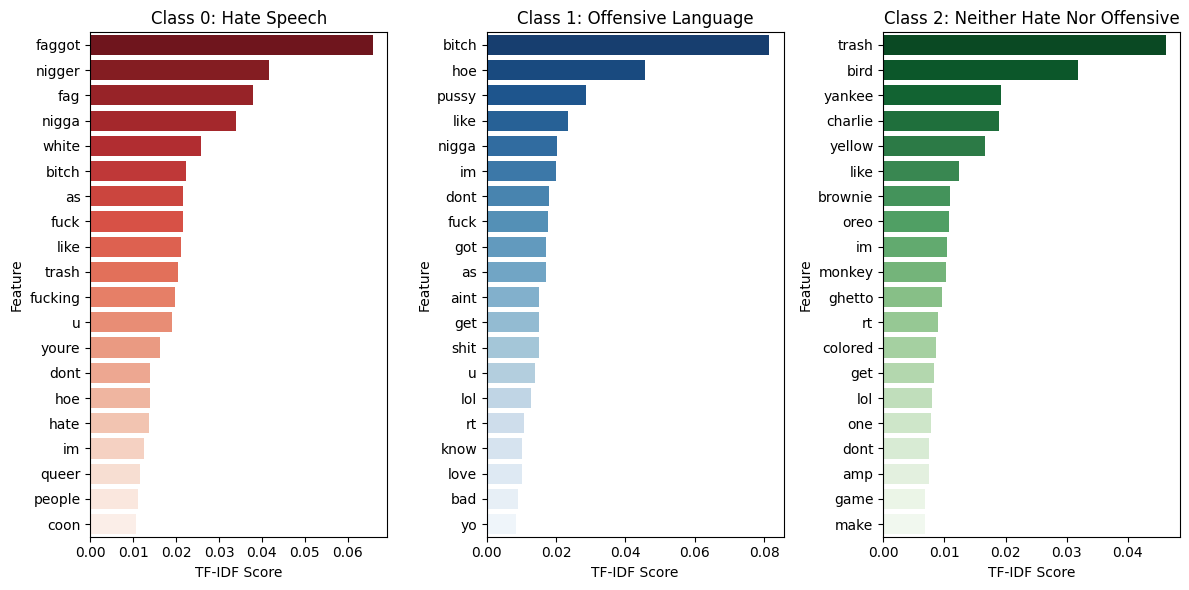

In [33]:
# Plotting top features for each class
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Score', y='Feature', data=ft_cl_0, palette='Reds_r')
plt.title("Class 0: Hate Speech")
plt.xlabel("TF-IDF Score")
plt.ylabel("Feature")

plt.subplot(1, 3, 2)
sns.barplot(x='Score', y='Feature', data=ft_cl_1, palette='Blues_r')
plt.title("Class 1: Offensive Language")
plt.xlabel("TF-IDF Score")
plt.ylabel("Feature")

plt.subplot(1, 3, 3)
sns.barplot(x='Score', y='Feature', data=ft_cl_2, palette='Greens_r')
plt.title("Class 2: Neither Hate Nor Offensive")
plt.xlabel("TF-IDF Score")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

Synthetic Minority Oversampling Technique (SMOTE) to balance the data

In [34]:
# Initializing SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(tfidf_matrix, df['class'])

In [35]:
print("Distribution of Class After Applying SMOTE:", np.bincount(y_smote))

Distribution of Class After Applying SMOTE: [19190 19190 19190]


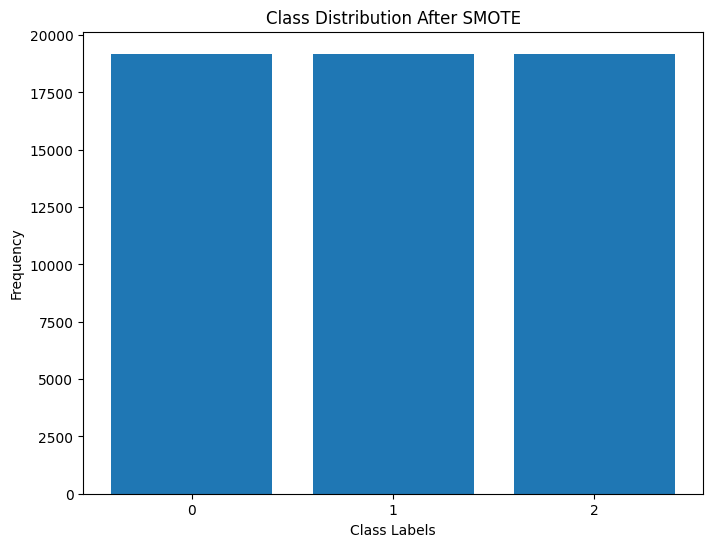

In [36]:
# Plotting class values after applying SMOTE
class_cn = np.bincount(y_smote)

plt.figure(figsize=(8, 6))
plt.bar(range(len(class_cn)), class_cn)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution After SMOTE')
plt.xticks(range(len(class_cn)))
plt.show()

In [37]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# **Synthetic Tweets for Testing Models**

In [38]:
# Just created these tweets by referring the dataset
# So My intension is not to hurt anyone by using these words

user_input = ["Lets just say Good Morning",
              "In yellow dress she looks ADORABLE!",
              "I love those yellow flowers",
              "Lets raise like a phoenix bird",
              "he is a faggot",
              "dont be a dumb ugly stupid bullshit ass bitch",
              "I dont give fuck to that nigga",
              "Im a fucking nigga to that bitch "
              "Just get away from my eyes negga",
              "You're a garden rose, and that bitch is a weed",
              "I hate seeing your fucking face, get away from my eye sight",
              "She is a good singer and she sings like a humming bird",
              "you are smartest pussy",
              "she said,I dont like that bitch",
              "Im going out with this nigger",
              "she dont like to sit beside that fucking gay",
              "In some places white people hate black people to see around them",
              "She is a ugly bitch never go to that bitch",
              "she is smart and good human",
              " I HATE BLACK PEOPLE This is why there's black people and niggers",
              " you fat ugly ass couldn't even pull the ugly bitch in the college",
              "That pic is now circulated by Jihadis with a call to kill innocent people.",
              "We can't trust these hoes at this moment",
              "you look like your 12 stop talking about fucking bitches or else you wil be kicked out frm home",
              " I'm an early bird and I'm a night owl, so I'm wise and have worms",
              "i saved a dog yesterday.",
              "thanks to everyone that dedicated time to meet me",
              "Even you look like trash and someone always compliments you",
              "She is smarter than him",
              "she said this guy is the biggest faggot omfg"]

# LSTM **Model**

In [39]:
# Reshaping X_train and X_test to include the features dimension
X_train_re = X_train.toarray().reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_re = X_test.toarray().reshape(X_test.shape[0], 1, X_test.shape[1])

In [40]:
# Initializing the LSTM model's
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train_re.shape[1], X_train_re.shape[2])),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [41]:
# Compiling the model and fitting
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_re, y_train, epochs=10, batch_size=64, validation_data=(X_test_re, y_test))

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.7206 - loss: 0.7176 - val_accuracy: 0.9159 - val_loss: 0.2563
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.9255 - loss: 0.2244 - val_accuracy: 0.9282 - val_loss: 0.2182
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 66s 92ms/step - accuracy: 0.9506 - loss: 0.1590 - val_accuracy: 0.9365 - val_loss: 0.2099
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 67s 93ms/step - accuracy: 0.9587 - loss: 0.1290 - val_accuracy: 0.9394 - val_loss: 0.2221
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 78s 88ms/step - accuracy: 0.9664 - loss: 0.1050 - val_accuracy: 0.9371 - val_loss: 0.2413
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 70s 98ms/step - accuracy: 0.9705 - loss: 0.0949 - val_accuracy: 0.9389 - val_loss: 0.2606
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 66s 92ms/step - accuracy: 0.9716 - loss: 0.0888 - val_accuracy: 0.9422 - val_loss: 0.2670
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 89s 101ms/step - accuracy: 0.9767 - loss: 0.0742 -

In [42]:
# Making predictions
y_pred = model.predict(X_test_re)
y_pred_cl = np.argmax(y_pred, axis=1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


In [43]:
# Calculating accuracy
acc_lstm = accuracy_score(y_test, y_pred_cl)

In [44]:
# Printing Classification report and accuracy
print("\nClassification Report of LSTM:\n", classification_report(y_test, y_pred_cl,target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
print("Accuracy of LSTM:", acc_lstm)


Classification Report of LSTM:
                             precision    recall  f1-score   support

               Hate Speech       0.91      0.98      0.94      3849
        Offensive Language       0.98      0.85      0.91      3794
Neither Hate Nor Offensive       0.94      0.99      0.96      3871

                  accuracy                           0.94     11514
                 macro avg       0.94      0.94      0.94     11514
              weighted avg       0.94      0.94      0.94     11514

Accuracy of LSTM: 0.9410283133576516


Confusion Matrix

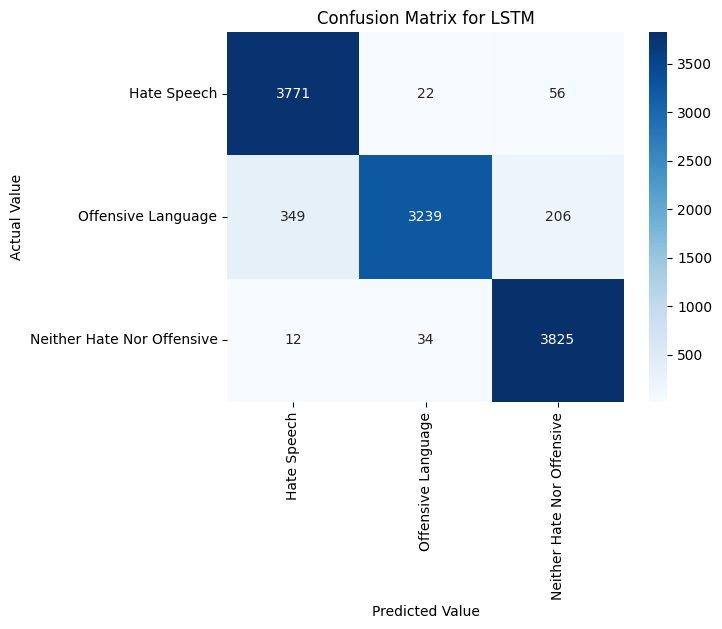

In [45]:
cm = confusion_matrix(y_test, y_pred_cl)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for LSTM')
plt.show()

In [46]:
# Predicting probabilities for AUC-ROC and log loss
y_pred_prob_lstm = model.predict(X_test_re)

360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [47]:
# Binarizing the y_test labels for multi-class ROC curve plotting
y_test_bi = label_binarize(y_test, classes=[0, 1, 2])

In [48]:
# Calculating ROC value for each value of class
fpr_lstm_hs, tpr_lstm_hs, _ = roc_curve(y_test_bi[:, 0], y_pred_prob_lstm[:, 0])
fpr_lstm_ol, tpr_lstm_ol, _ = roc_curve(y_test_bi[:, 1], y_pred_prob_lstm[:, 1])
fpr_lstm_nr, tpr_lstm_nr, _ = roc_curve(y_test_bi[:, 2], y_pred_prob_lstm[:, 2])

roc_auc_lstm_hs = auc(fpr_lstm_hs, tpr_lstm_hs)
roc_auc_lstm_ol = auc(fpr_lstm_ol, tpr_lstm_ol)
roc_auc_lstm_nr = auc(fpr_lstm_nr, tpr_lstm_nr)

In [49]:
# Calculating log loss
log_loss_value_lstm = log_loss(y_test, y_pred_prob_lstm)

In [50]:
print(f"AUC-ROC (LSTM): {roc_auc_lstm_hs:.2f}, {roc_auc_lstm_ol:.2f}, {roc_auc_lstm_nr:.2f}")
print(f"Log Loss (LSTM): {log_loss_value_lstm:.2f}")

AUC-ROC (LSTM): 0.98, 0.96, 0.99
Log Loss (LSTM): 0.32


ROC Curve

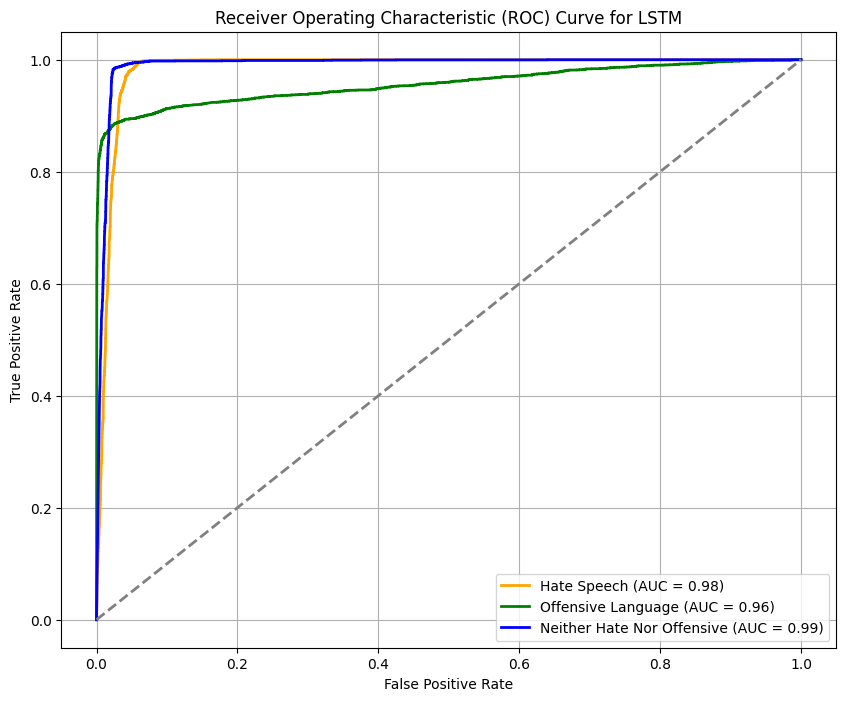

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm_hs, tpr_lstm_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_lstm_hs)
plt.plot(fpr_lstm_ol, tpr_lstm_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_lstm_ol)
plt.plot(fpr_lstm_nr, tpr_lstm_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_lstm_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Testing

In [52]:
def predict_lstm(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    tfidf_input_reshaped = tfidf_input.toarray().reshape(tfidf_input.shape[0], 1, tfidf_input.shape[1])
    prediction = model.predict(tfidf_input_reshaped)
    pred_class = np.argmax(prediction, axis=1)[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = predict_lstm(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Text: he is a faggot
Predicted Category: Hate Speech
---------------------------------------------------------------------

Saving the Model

In [53]:
# this is a deep learning model so we need to save the model in HDFS formate
model.save('lstm_model.h5')


# **Logistic Regression Model**

In [54]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [55]:
y_pred_log = log_reg.predict(X_test)

In [56]:
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of Logistic Regression: {acc_log:.4f}")

Classification Report of Logistic Regression:
                            precision    recall  f1-score   support

               Hate Speech       0.90      0.89      0.89      3849
        Offensive Language       0.94      0.85      0.89      3794
Neither Hate Nor Offensive       0.89      0.98      0.93      3871

                  accuracy                           0.91     11514
                 macro avg       0.91      0.91      0.91     11514
              weighted avg       0.91      0.91      0.91     11514

Accuracy of Logistic Regression: 0.9073


Confusion Matrix

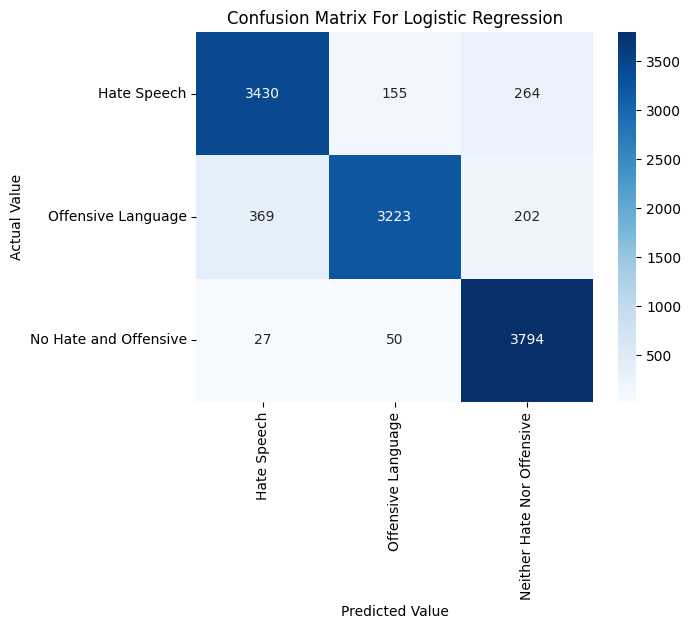

In [57]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

In [58]:
y_pred_prob_log = log_reg.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_pred_prob_log, multi_class='ovr')
log_loss_value = log_loss(y_test, y_pred_prob_log)
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

AUC-ROC: 0.98
Log Loss: 0.30


We got less accuracy compared to other models so decided to perform hyper tunning in further steps

ROC Curve

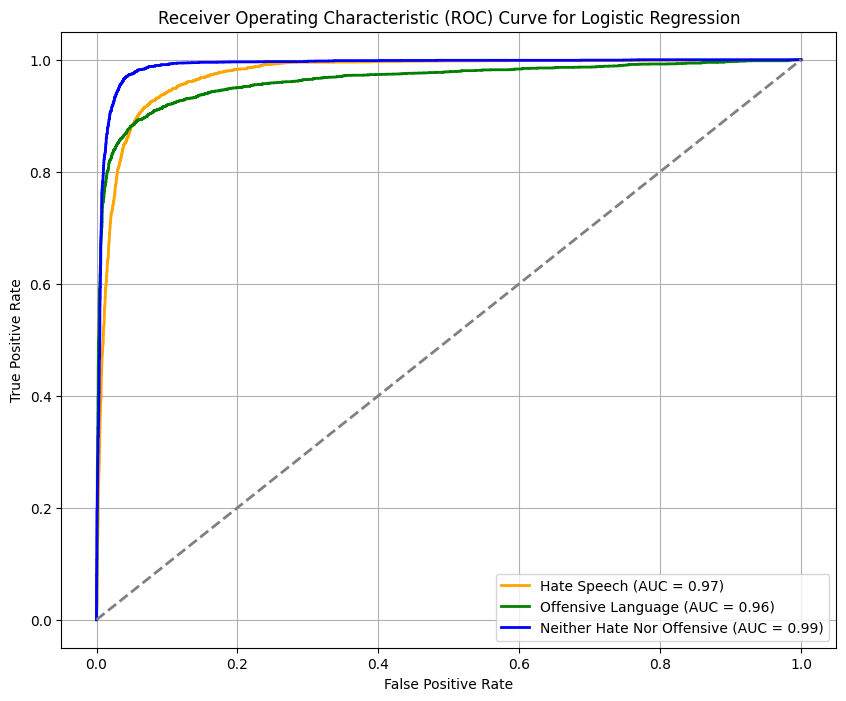

In [59]:
fpr_log_hs, tpr_log_hs, _ = roc_curve(y_test_bi[:, 0], y_pred_prob_log[:, 0])
fpr_log_ol, tpr_log_ol, _ = roc_curve(y_test_bi[:, 1], y_pred_prob_log[:, 1])
fpr_log_nr, tpr_log_nr, _ = roc_curve(y_test_bi[:, 2], y_pred_prob_log[:, 2])

roc_auc_log_hs = auc(fpr_log_hs, tpr_log_hs)
roc_auc_log_ol = auc(fpr_log_ol, tpr_log_ol)
roc_auc_log_nr = auc(fpr_log_nr, tpr_log_nr)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_hs, tpr_log_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_log_hs)
plt.plot(fpr_log_ol, tpr_log_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_log_ol)
plt.plot(fpr_log_nr, tpr_log_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_log_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [60]:
def pred_log_reg(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = log_reg.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = pred_log_reg(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

**Hyperparameter Tuning Logistic Regression with GridSearchCV**

In [61]:
# Defining the parameter grid
para_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}

In [62]:
log_reg_tn = LogisticRegression(class_weight='balanced',random_state=42)

In [63]:
# Initializing the GridSearchCV
grid_sc = GridSearchCV(estimator=log_reg_tn, param_grid=para_grid, cv=3, verbose=2, n_jobs=-1)
grid_sc.fit(X_train, y_train)
print("Best parameters found: ", grid_sc.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_sc.best_score_))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'C': 100, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'saga'}
Best cross-validation score: 0.9217


In [64]:
best_log_reg_model = grid_sc.best_estimator_
y_pred_log_reg_tn = best_log_reg_model.predict(X_test)

In [65]:
print("Classification Report of Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg_tn, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_log_reg = accuracy_score(y_test, y_pred_log_reg_tn)
print(f"Accuracy of Tuned Logistic Regression: {acc_log_reg:.4f}")

Classification Report of Tuned Logistic Regression:
                            precision    recall  f1-score   support

               Hate Speech       0.90      0.97      0.93      3849
        Offensive Language       0.98      0.85      0.91      3794
Neither Hate Nor Offensive       0.94      0.99      0.96      3871

                  accuracy                           0.93     11514
                 macro avg       0.94      0.93      0.93     11514
              weighted avg       0.94      0.93      0.93     11514

Accuracy of Tuned Logistic Regression: 0.9334


In [66]:
y_pred_prob_log_reg_tn = best_log_reg_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test,y_pred_prob_log_reg_tn, multi_class='ovr')
log_loss_value = log_loss(y_test, y_pred_prob_log_reg_tn)
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

AUC-ROC: 0.98
Log Loss: 0.25


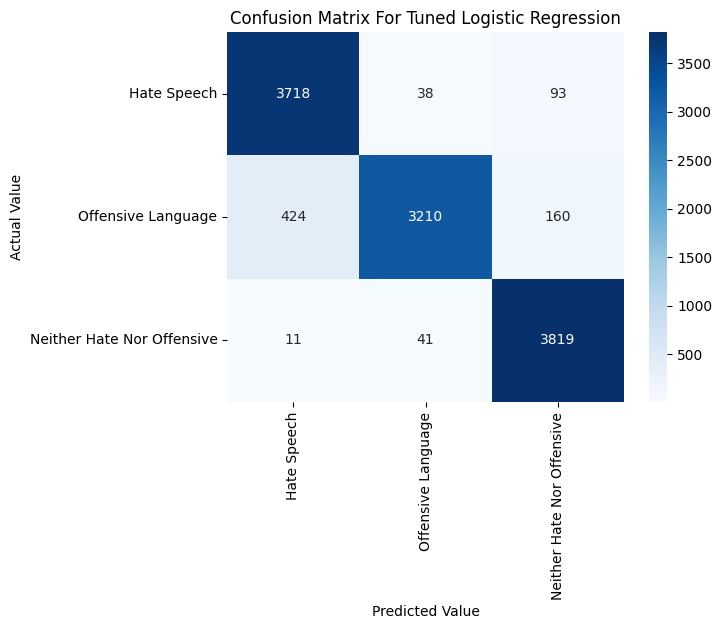

In [67]:
cm = confusion_matrix(y_test, y_pred_log_reg_tn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix For Tuned Logistic Regression')
plt.show()

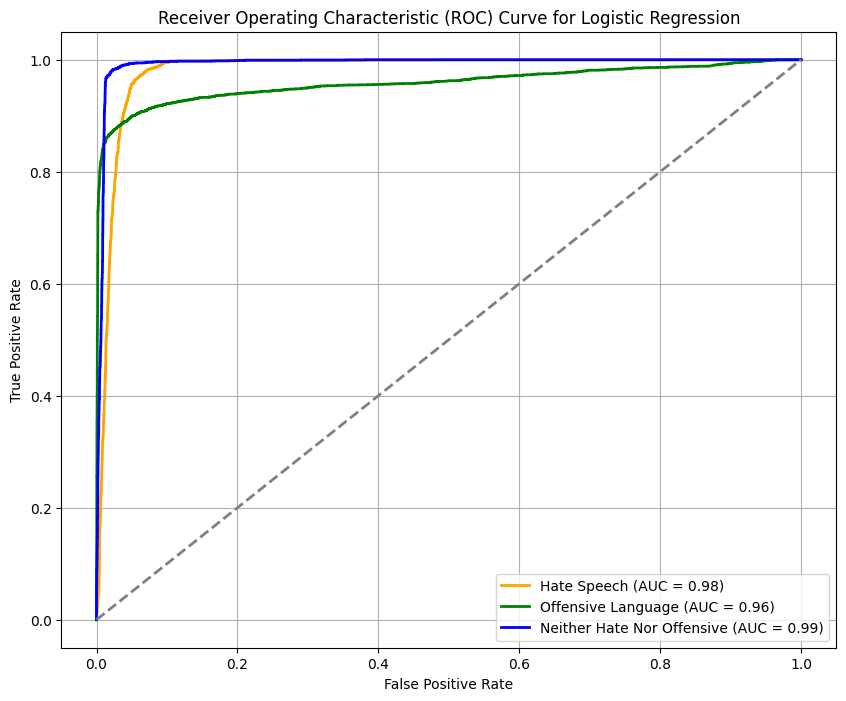

In [68]:
# ROC Curve for Tuned Logistic Regression
fpr_log_tn_hs, tpr_log_tn_hs, _ = roc_curve(y_test_bi[:, 0], y_pred_prob_log_reg_tn[:, 0])
fpr_log_tn_ol, tpr_log_tn_ol, _ = roc_curve(y_test_bi[:, 1], y_pred_prob_log_reg_tn[:, 1])
fpr_log_tn_nr, tpr_log_tn_nr, _ = roc_curve(y_test_bi[:, 2], y_pred_prob_log_reg_tn[:, 2])

roc_auc_log_tn_hs = auc(fpr_log_tn_hs, tpr_log_tn_hs)
roc_auc_log_tn_ol = auc(fpr_log_tn_ol, tpr_log_tn_ol)
roc_auc_log_tn_nr = auc(fpr_log_tn_nr, tpr_log_tn_nr)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_tn_hs, tpr_log_tn_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_log_tn_hs)
plt.plot(fpr_log_tn_ol, tpr_log_tn_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_log_tn_ol)
plt.plot(fpr_log_tn_nr, tpr_log_tn_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_log_tn_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Testing for Tuned Logistic Regression Model

In [69]:
def pred_log_reg_tn(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = best_log_reg_model.predict(tfidf_input)
    predicted_class = prediction[0]
    label_mapping = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_mapping[predicted_class]

for text in user_input:
    category = pred_log_reg_tn(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

**After tunning only 3% accuracy increased, AUC_ROC is same, Log Loss is decreased. So sticking with default model**

Model Testing For Default Logistic Regression Model

Saving the Model

In [70]:
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

# Random Forest Classifier Model

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
y_pred_rf = rf_model.predict(X_test)

In [73]:
print("Classification Report of Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {acc_rf:.4f}")

Classification Report of Random Forest:
                            precision    recall  f1-score   support

               Hate Speech       0.95      0.98      0.97      3849
        Offensive Language       0.98      0.91      0.94      3794
Neither Hate Nor Offensive       0.96      0.99      0.97      3871

                  accuracy                           0.96     11514
                 macro avg       0.96      0.96      0.96     11514
              weighted avg       0.96      0.96      0.96     11514

Accuracy of Random Forest: 0.9607


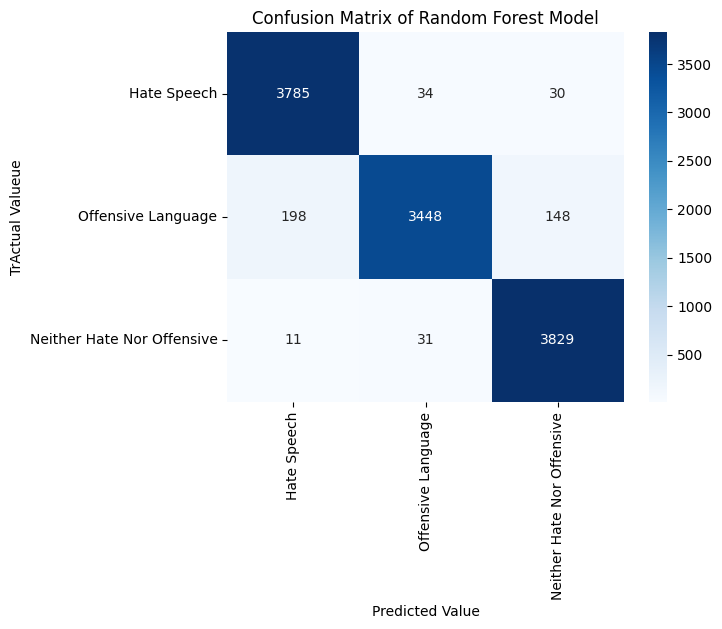

In [74]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('TrActual Valueue')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

In [75]:
y_pred_prob_rf = rf_model.predict_proba(X_test)
# AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr')
log_loss_value = log_loss(y_test, y_pred_prob_rf)
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

AUC-ROC: 1.00
Log Loss: 0.16


ROC Curve

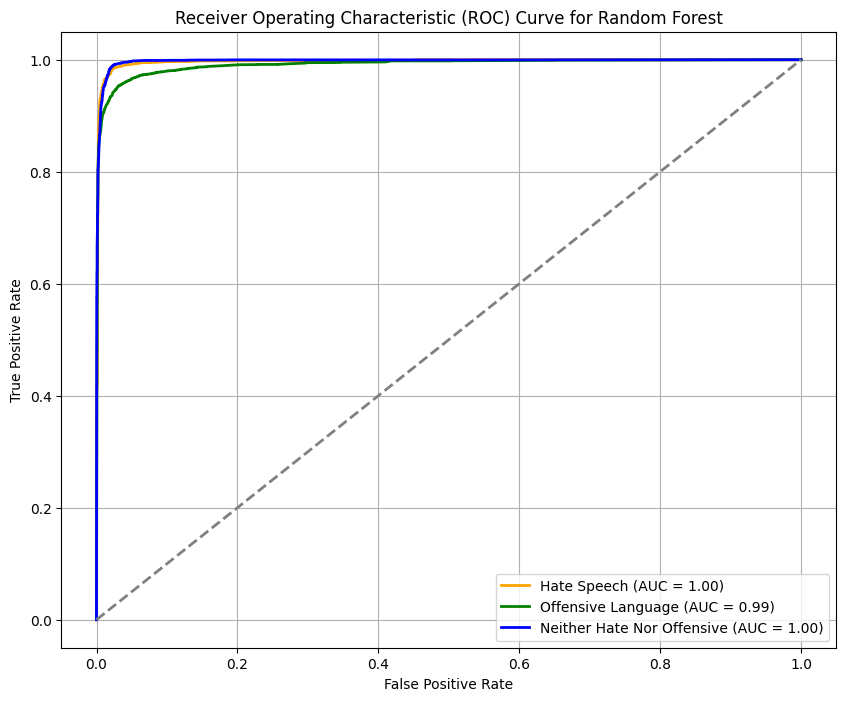

In [76]:
# ROC Curve for Random Forest
fpr_rf_hs, tpr_rf_hs, _ = roc_curve(y_test_bi[:, 0], y_pred_prob_rf[:, 0])
fpr_rf_ol, tpr_rf_ol, _ = roc_curve(y_test_bi[:, 1], y_pred_prob_rf[:, 1])
fpr_rf_nr, tpr_rf_nr, _ = roc_curve(y_test_bi[:, 2], y_pred_prob_rf[:, 2])

# Computing AUC for each class
roc_auc_rf_hs = auc(fpr_rf_hs, tpr_rf_hs)
roc_auc_rf_ol = auc(fpr_rf_ol, tpr_rf_ol)
roc_auc_rf_nr = auc(fpr_rf_nr, tpr_rf_nr)

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf_hs, tpr_rf_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_rf_hs)
plt.plot(fpr_rf_ol, tpr_rf_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_rf_ol)
plt.plot(fpr_rf_nr, tpr_rf_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_rf_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [77]:
def predict_rf(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = rf_model.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = predict_rf(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Offensive Language
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: I d

In [78]:
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

# Decision Tree Classifier Model

In [79]:
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [80]:
y_pred_dt = dt.predict(X_test)

In [81]:
print("Classification Report of Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree Classifier: {acc_dt:.4f}")

Classification Report of Decision Tree Classifier:
                            precision    recall  f1-score   support

               Hate Speech       0.93      0.96      0.95      3849
        Offensive Language       0.95      0.89      0.92      3794
Neither Hate Nor Offensive       0.96      0.98      0.97      3871

                  accuracy                           0.94     11514
                 macro avg       0.94      0.94      0.94     11514
              weighted avg       0.94      0.94      0.94     11514

Accuracy of Decision Tree Classifier: 0.9447


Confusion Matrix

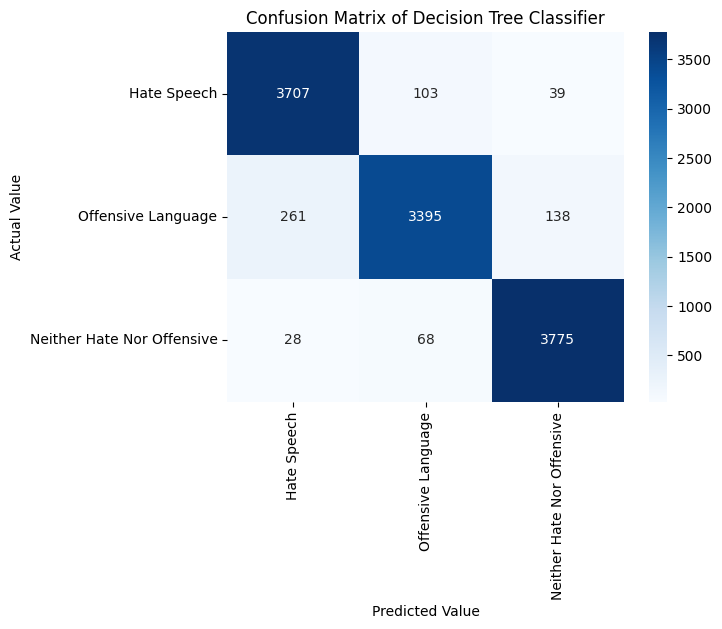

In [82]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

In [83]:
y_pred_prob_dt = dt.predict_proba(X_test)
auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovr')
log_loss_dt = log_loss(y_test, y_pred_prob_dt)
print(f"AUC-ROC: {auc_roc_dt:.2f}")
print(f"Log Loss: {log_loss_dt:.2f}")

AUC-ROC: 0.96
Log Loss: 1.90


Log Loss is 2.09 which is not a good score. It suggests that model is not confident in prediction even though its predictions are good. So performing hyper parameter tuning

ROC Curve

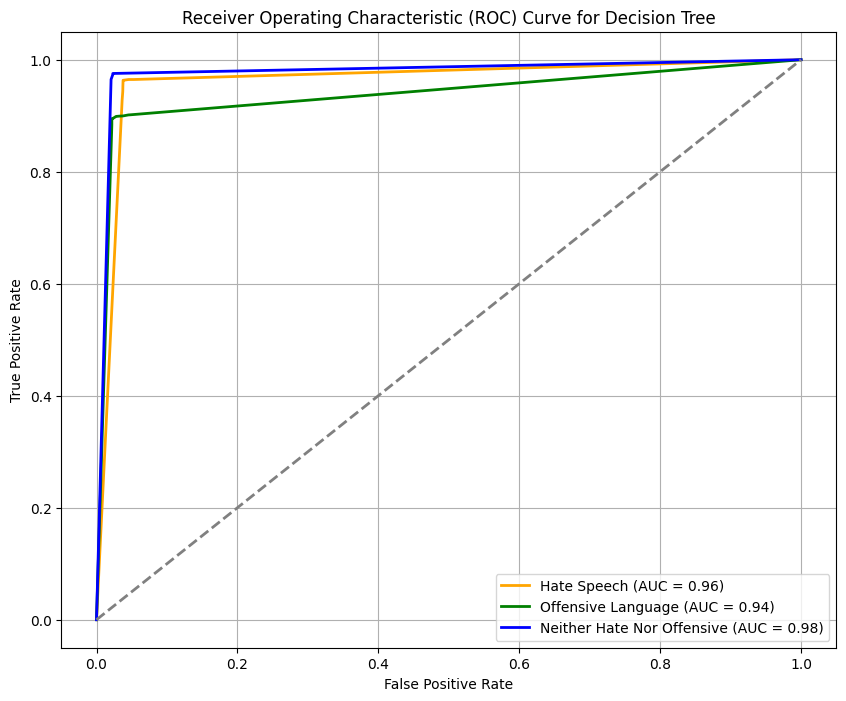

In [84]:
fpr_dt_hs, tpr_dt_hs, _ = roc_curve(y_test_bi[:, 0], y_pred_prob_dt[:, 0])
fpr_dt_ol, tpr_dt_ol, _ = roc_curve(y_test_bi[:, 1], y_pred_prob_dt[:, 1])
fpr_dt_nr, tpr_dt_nr, _ = roc_curve(y_test_bi[:, 2], y_pred_prob_dt[:, 2])

roc_auc_dt_hs = auc(fpr_dt_hs, tpr_dt_hs)
roc_auc_dt_ol = auc(fpr_dt_ol, tpr_dt_ol)
roc_auc_dt_nr = auc(fpr_dt_nr, tpr_dt_nr)

plt.figure(figsize=(10, 8))
plt.plot(fpr_dt_hs, tpr_dt_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_dt_hs)
plt.plot(fpr_dt_ol, tpr_dt_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_dt_ol)
plt.plot(fpr_dt_nr, tpr_dt_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_dt_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Testing

In [85]:
def predict_dt(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = dt.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = predict_dt(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

Hyper Tunning Using Grid Search

In [86]:
# Defining the parameter grid
para_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy']
}

In [87]:
# Initializing the model
dt_tn = DecisionTreeClassifier(random_state=42)

In [88]:
# Initializing the Grid Search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=para_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [89]:
# Fitting the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Getting the best estimator and best parameters
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9345


In [148]:
# Trainning the best model on the entire training set
best_dt.fit(X_train, y_train)
y_pred_best = best_dt.predict(X_test)

print("\nClassification Report of Tuned Decision Tree:")
print(classification_report(y_test, y_pred_best, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy of Tuned Decision Tree: {acc_best:.4f}")


Classification Report of Tuned Decision Tree:
                            precision    recall  f1-score   support

               Hate Speech       0.93      0.96      0.95      3849
        Offensive Language       0.95      0.89      0.92      3794
Neither Hate Nor Offensive       0.96      0.98      0.97      3871

                  accuracy                           0.94     11514
                 macro avg       0.94      0.94      0.94     11514
              weighted avg       0.94      0.94      0.94     11514


Accuracy of Tuned Decision Tree: 0.9447


In [149]:
y_pred_prob_best = best_dt.predict_proba(X_test)

auc_roc_best = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovr')
print(f"AUC-ROC: {auc_roc_best:.4f}")

log_loss_best = log_loss(y_test, y_pred_prob_best)
print(f"Log Loss: {log_loss_best:.4f}")

AUC-ROC: 0.9596
Log Loss: 1.9002


Still we got high Log Loss so decided to choose other hyper tuning method : Hyperband method(an optimized version of random search)

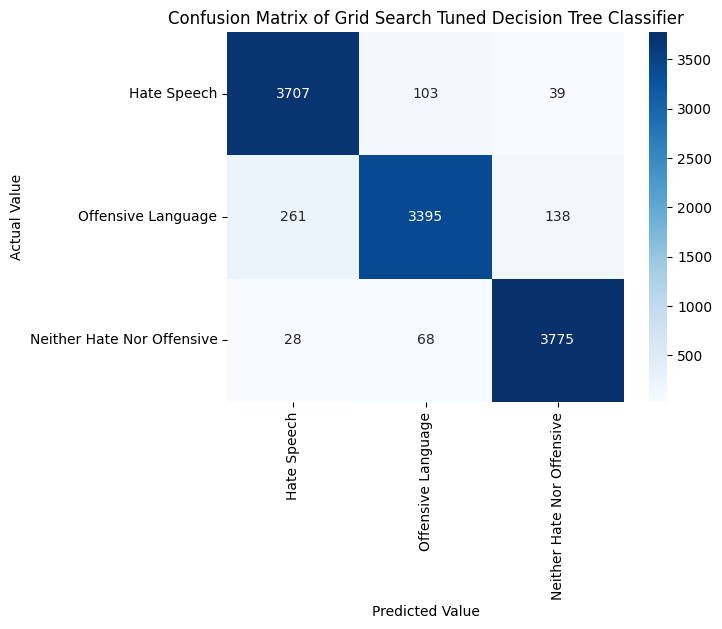

In [91]:
cm_best_dt = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of Grid Search Tuned Decision Tree Classifier')
plt.show()

In [150]:
def pred_best_dt(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = best_dt.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = pred_best_dt(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

**Hyperband (Optimized version of Random Search)**


In [93]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(params):
    model = DecisionTreeClassifier(**params, class_weight='balanced', random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define the search space
space = {
    'max_depth': hp.choice('max_depth', [5, 10, 20, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 10, 20]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

# Perform the search
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print("Best Parameters:", best_params)


100%|██████████| 50/50 [17:30<00:00, 21.01s/trial, best loss: -0.9345361695150783]
Best Parameters: {'criterion': 0, 'max_depth': 3, 'min_samples_leaf': 0, 'min_samples_split': 0}


In [152]:
# Train the final model using the best parameters
dt_tn = DecisionTreeClassifier(
    max_depth=[5, 10, 20, None][best_params['max_depth']],
    min_samples_split=[2, 10, 20][best_params['min_samples_split']],
    min_samples_leaf=[1, 2, 4][best_params['min_samples_leaf']],
    criterion=['gini', 'entropy'][best_params['criterion']],
    class_weight='balanced',
    random_state=42
)
dt_tn.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [153]:
# Predictions
y_pred_dt_tn = dt_tn.predict(X_test)

print("\nClassification Report of Hyperband Tuned Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt_tn, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_dt_tn = accuracy_score(y_test, y_pred_dt_tn)
print(f"Accuracy of Hyperband Tuned Decision Tree Classifier: {acc_dt_tn:.4f}")


Classification Report of Hyperband Tuned Decision Tree Classifier:
                            precision    recall  f1-score   support

               Hate Speech       0.93      0.96      0.95      3849
        Offensive Language       0.95      0.89      0.92      3794
Neither Hate Nor Offensive       0.96      0.98      0.97      3871

                  accuracy                           0.94     11514
                 macro avg       0.94      0.94      0.94     11514
              weighted avg       0.94      0.94      0.94     11514

Accuracy of Hyperband Tuned Decision Tree Classifier: 0.9447


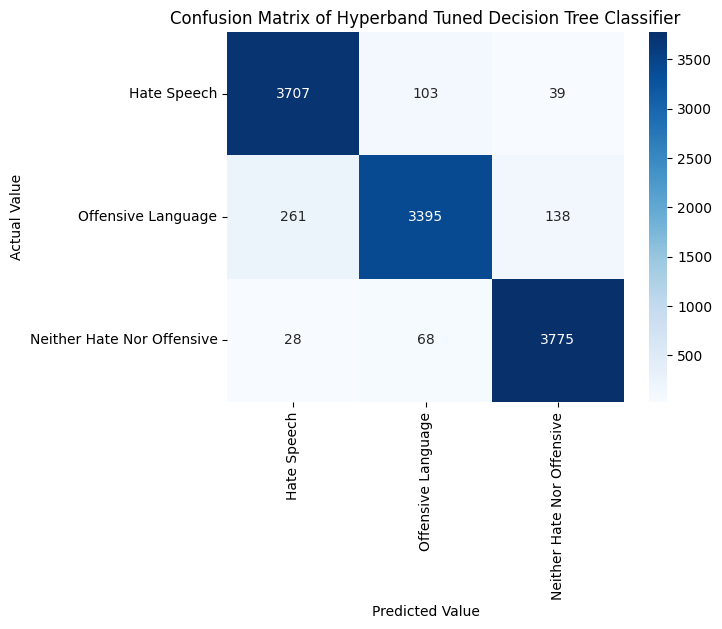

In [154]:
cm_hp_dt = confusion_matrix(y_test, y_pred_dt_tn)
sns.heatmap(cm_hp_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of Hyperband Tuned Decision Tree Classifier')
plt.show()

In [137]:
# Calculate AUC-ROC and Log Loss
y_pred_prob_dt_tn = dt_tn.predict_proba(X_test)
auc_roc_dt_tn = roc_auc_score(y_test, y_pred_prob_dt_tn, multi_class='ovr')
log_loss_dt_tn = log_loss(y_test, y_pred_prob_dt_tn)

In [138]:
print(f"AUC-ROC: {auc_roc_dt_tn:.2f}")
print(f"Log Loss: {log_loss_dt_tn:.2f}")

AUC-ROC: 0.96
Log Loss: 1.90


In [97]:
def pred_dt_tn(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = dt_tn.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = pred_dt_tn(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

**Bayesian Optimization Hyper tunning method**

In [98]:
import keras_tuner as kt

In [99]:
def build_dt_model(hp):
    return DecisionTreeClassifier(
        max_depth=hp.Int('max_depth', min_value=5, max_value=50, step=5),
        min_samples_split=hp.Int('min_samples_split', min_value=2, max_value=20, step=2),
        min_samples_leaf=hp.Int('min_samples_leaf', min_value=1, max_value=10, step=1),
        criterion=hp.Choice('criterion', values=['gini', 'entropy']),
        class_weight='balanced',
        random_state=42
    )

# Defining the tuner
tuner = kt.BayesianOptimization(
    hypermodel=build_dt_model,
    objective='val_accuracy',
    max_trials=50,
    directory='nas_decision_tree',
    project_name='dt_tuning'
)

# Customizing evaluation
def fit_and_score_model(hp):
    dt = build_dt_model(hp)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [100]:
# Performing tuning
best_hp = None
best_acc = 0

for trial in range(tuner.oracle.max_trials):
    hp = tuner.oracle.create_trial(f"trial-{trial}")
    acc = fit_and_score_model(hp.hyperparameters)
    tuner.oracle.update_trial(hp.trial_id, {'val_accuracy': acc})

    if acc > best_acc:
        best_acc = acc
        best_hp = hp.hyperparameters

    print(f"Trial {trial + 1}: Accuracy = {acc:.4f}")
    tuner.oracle.end_trial(hp.trial_id, kt.engine.trial.TrialStatus.COMPLETED)


# Extracting the best hyperparameters
print("\nBest Hyperparameters Found:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")

print(f"Best Accuracy: {best_acc:.4f}")

Trial 50 Complete [00h 00m 04s]
val_accuracy: 0.90055584505819

Best val_accuracy So Far: 0.9095014764634358
Total elapsed time: 00h 03m 29s

Best Hyperparameters Found:
max_depth: 45
min_samples_split: 18
min_samples_leaf: 5
criterion: entropy
Best Accuracy: 0.9095


In [101]:
# Training with best hyperparameters
dt_tn_bs = DecisionTreeClassifier(
    max_depth=best_hp.get('max_depth'),
    min_samples_split=best_hp.get('min_samples_split'),
    min_samples_leaf=best_hp.get('min_samples_leaf'),
    criterion=best_hp.get('criterion'),
    class_weight='balanced',
    random_state=42
)
dt_tn_bs.fit(X_train, y_train)

y_pred_dt_tn_bs = dt_tn_bs.predict(X_test)

In [143]:
# Classification Report
print("\nClassification Report of Bayesian Optimizated Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt_tn_bs, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))

# Accuracy
acc_dt_tn_bs = accuracy_score(y_test, y_pred_dt_tn_bs)
print(f"Accuracy of Decision Tree Classifier after tunning with Bayesian Optimization: {acc_dt_tn_bs:.4f}")


Classification Report of Bayesian Optimizated Decision Tree Classifier:
                            precision    recall  f1-score   support

               Hate Speech       0.92      0.87      0.90      3849
        Offensive Language       0.91      0.88      0.89      3794
Neither Hate Nor Offensive       0.90      0.98      0.94      3871

                  accuracy                           0.91     11514
                 macro avg       0.91      0.91      0.91     11514
              weighted avg       0.91      0.91      0.91     11514

Accuracy of Decision Tree Classifier after tunning with Bayesian Optimization: 0.9095


In [146]:
# AUC-ROC and Log Loss
y_pred_prob_dt_tn_bs = dt_tn_bs.predict_proba(X_test)
auc_roc_dt_tn_bs = roc_auc_score(y_test, y_pred_prob_dt_tn_bs, multi_class='ovr')
log_loss_dt_tn_bs = log_loss(y_test, y_pred_prob_dt_tn_bs)
print(f"AUC-ROC: {auc_roc_dt_tn_bs:.2f}")
print(f"Log Loss: {log_loss_dt_tn_bs:.2f}")

AUC-ROC: 0.96
Log Loss: 0.94


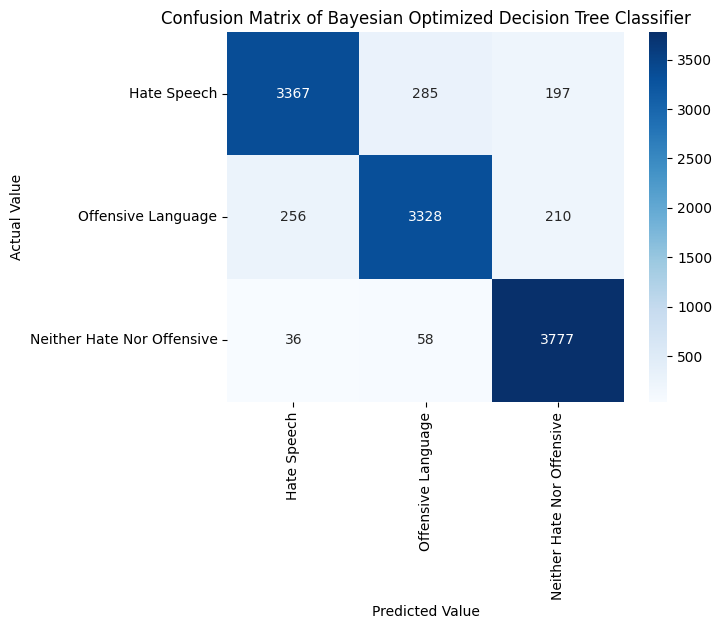

In [145]:
cm_bn_dt = confusion_matrix(y_test, y_pred_dt_tn_bs)
sns.heatmap(cm_bn_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of Bayesian Optimized Decision Tree Classifier')
plt.show()

In [147]:
def pred_dt_tn_bs(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = dt_tn_bs.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = pred_dt_tn_bs(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

In [104]:
joblib.dump(dt_tn_bs, 'bayesian_optimied_decision_tree_model.pkl')

['bayesian_optimied_decision_tree_model.pkl']

Saving the Model

In [105]:
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

# Support Vector Classifier Model (SVC)

In [106]:
svc_model = SVC(probability=True, class_weight='balanced', random_state=42)
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [107]:
y_pred_svc = svc_model.predict(X_test)

In [118]:
print("Classification Report of SVC Model :")
print(classification_report(y_test, y_pred_svc, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]))
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy of SVC: {accuracy_svc:.4f}")

Classification Report of SVC Model :
                            precision    recall  f1-score   support

               Hate Speech       0.99      0.94      0.96      3849
        Offensive Language       0.96      0.96      0.96      3794
Neither Hate Nor Offensive       0.94      0.98      0.96      3871

                  accuracy                           0.96     11514
                 macro avg       0.96      0.96      0.96     11514
              weighted avg       0.96      0.96      0.96     11514

Accuracy of SVC: 0.9607


In [109]:
y_pred_prob_svc = svc_model.predict_proba(X_test)
log_loss_value = log_loss(y_test, y_pred_prob_svc)

In [110]:
auc_roc = roc_auc_score(y_test, y_pred_prob_svc, multi_class='ovr')
log_loss_value = log_loss(y_test, y_pred_prob_svc)
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

AUC-ROC: 1.00
Log Loss: 0.11


**Confusion Matrix**

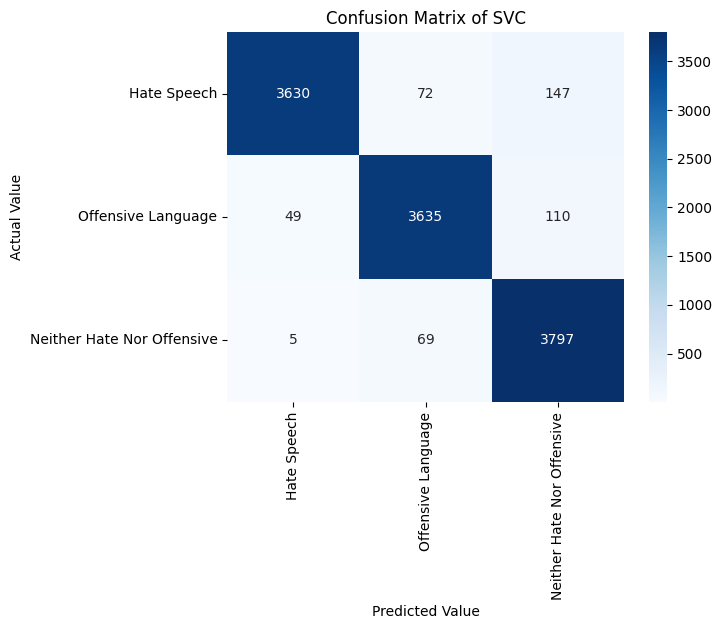

In [111]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], yticklabels=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of SVC')
plt.show()

ROC Curve

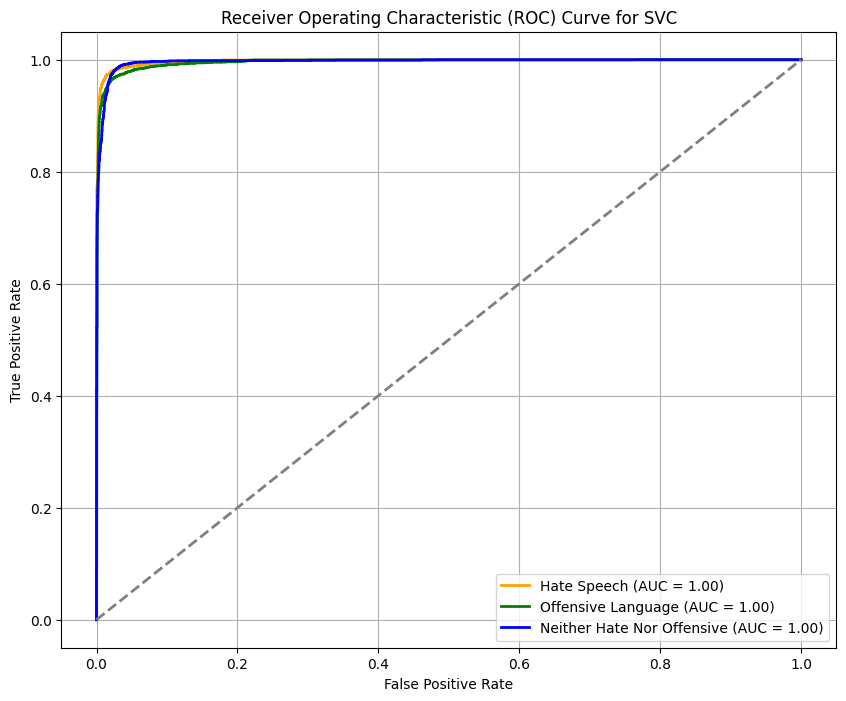

In [119]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_svc_hs, tpr_svc_hs, _ = roc_curve(y_test_bin[:, 0], y_pred_prob_svc[:, 0])
fpr_svc_ol, tpr_svc_ol, _ = roc_curve(y_test_bin[:, 1], y_pred_prob_svc[:, 1])
fpr_svc_nr, tpr_svc_nr, _ = roc_curve(y_test_bin[:, 2], y_pred_prob_svc[:, 2])

roc_auc_svc_hs = auc(fpr_svc_hs, tpr_svc_hs)
roc_auc_svc_ol = auc(fpr_svc_ol, tpr_svc_ol)
roc_auc_svc_nr = auc(fpr_svc_nr, tpr_svc_nr)

plt.figure(figsize=(10, 8))
plt.plot(fpr_svc_hs, tpr_svc_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_svc_hs)
plt.plot(fpr_svc_ol, tpr_svc_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_svc_ol)
plt.plot(fpr_svc_nr, tpr_svc_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_svc_nr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Model Testing**

In [114]:
def pred_svc(input_text):
    cld_text = cl_text(input_text)
    tkd_text = word_tokenize(cld_text)
    tfidf_input = vectorizer.transform([tkd_text])
    prediction = svc_model.predict(tfidf_input)
    pred_class = prediction[0]
    label_map = {
        0: "Hate Speech",
        1: "Offensive Language",
        2: "Neither Hate Nor Offensive"
    }
    return label_map[pred_class]

for text in user_input:
    category = pred_svc(text)
    print(f"Input Text: {text}")
    print(f"Predicted Category: {category}")
    print('-' * 80)

Input Text: Lets just say Good Morning
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: In yellow dress she looks ADORABLE!
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: I love those yellow flowers
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: Lets raise like a phoenix bird
Predicted Category: Neither Hate Nor Offensive
--------------------------------------------------------------------------------
Input Text: he is a faggot
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input Text: dont be a dumb ugly stupid bullshit ass bitch
Predicted Category: Hate Speech
--------------------------------------------------------------------------------
Input T

**Saving the model**

In [115]:
joblib.dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

# Over all Performance Presentation

In [120]:
metrics = {
    "Model": ["LSTM","Logistic Regression", "Random Forest", "Decision Tree", "SVC"],
    "Accuracy": [acc_lstm,acc_log, acc_rf, acc_dt,acc_svc]}

In [121]:
# Creating a new dataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

In [123]:
report_lstm = classification_report(y_test, y_pred_cl, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], output_dict=True)
precision_lstm = [report_lstm['Hate Speech']['precision'], report_lstm['Offensive Language']['precision'], report_lstm['Neither Hate Nor Offensive']['precision']]
recall_lstm = [report_lstm['Hate Speech']['recall'], report_lstm['Offensive Language']['recall'], report_lstm['Neither Hate Nor Offensive']['recall']]
f1_lstm = [report_lstm['Hate Speech']['f1-score'], report_lstm['Offensive Language']['f1-score'], report_lstm['Neither Hate Nor Offensive']['f1-score']]

report_log = classification_report(y_test, y_pred_log, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], output_dict=True)
precision_log = [report_log['Hate Speech']['precision'], report_log['Offensive Language']['precision'], report_log['Neither Hate Nor Offensive']['precision']]
recall_log = [report_log['Hate Speech']['recall'], report_log['Offensive Language']['recall'], report_log['Neither Hate Nor Offensive']['recall']]
f1_log = [report_log['Hate Speech']['f1-score'], report_log['Offensive Language']['f1-score'], report_log['Neither Hate Nor Offensive']['f1-score']]

report_rf = classification_report(y_test, y_pred_rf, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], output_dict=True)
precision_rf = [report_rf['Hate Speech']['precision'], report_rf['Offensive Language']['precision'], report_rf['Neither Hate Nor Offensive']['precision']]
recall_rf = [report_rf['Hate Speech']['recall'], report_rf['Offensive Language']['recall'], report_rf['Neither Hate Nor Offensive']['recall']]
f1_rf = [report_rf['Hate Speech']['f1-score'], report_rf['Offensive Language']['f1-score'], report_rf['Neither Hate Nor Offensive']['f1-score']]

report_dt = classification_report(y_test, y_pred_dt, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], output_dict=True)
precision_dt = [report_dt['Hate Speech']['precision'], report_dt['Offensive Language']['precision'], report_dt['Neither Hate Nor Offensive']['precision']]
recall_dt = [report_dt['Hate Speech']['recall'], report_dt['Offensive Language']['recall'], report_dt['Neither Hate Nor Offensive']['recall']]
f1_dt = [report_dt['Hate Speech']['f1-score'], report_dt['Offensive Language']['f1-score'], report_dt['Neither Hate Nor Offensive']['f1-score']]

report_svc = classification_report(y_test, y_pred_svc, target_names=["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"], output_dict=True)
precision_svc = [report_svc['Hate Speech']['precision'], report_svc['Offensive Language']['precision'], report_svc['Neither Hate Nor Offensive']['precision']]
recall_svc = [report_svc['Hate Speech']['recall'], report_svc['Offensive Language']['recall'], report_svc['Neither Hate Nor Offensive']['recall']]
f1_svc = [report_svc['Hate Speech']['f1-score'], report_svc['Offensive Language']['f1-score'], report_svc['Neither Hate Nor Offensive']['f1-score']]

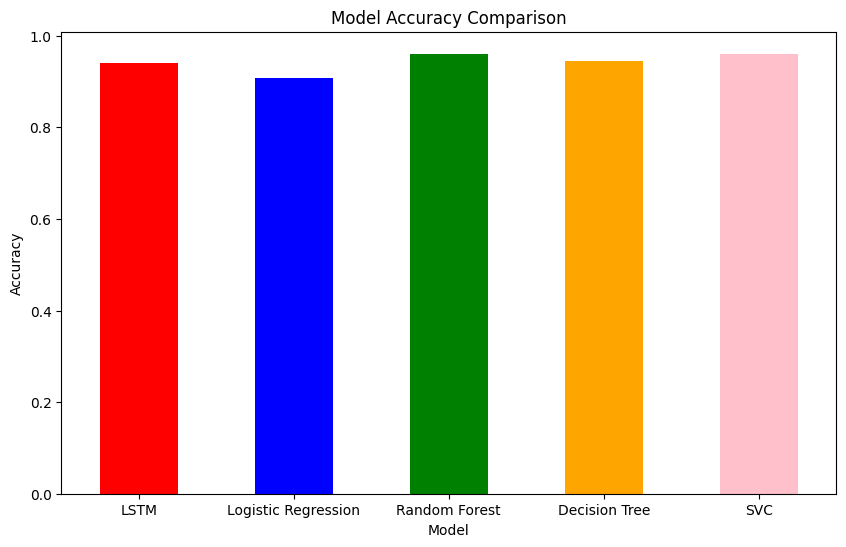

In [124]:
plt.figure(figsize=(10, 6))
metrics_df['Accuracy'].plot(kind='bar', color=['red','blue', 'green', 'orange', 'pink'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()


Plotting Evaluation Metric like Precision, Recall, F1 score as subplots

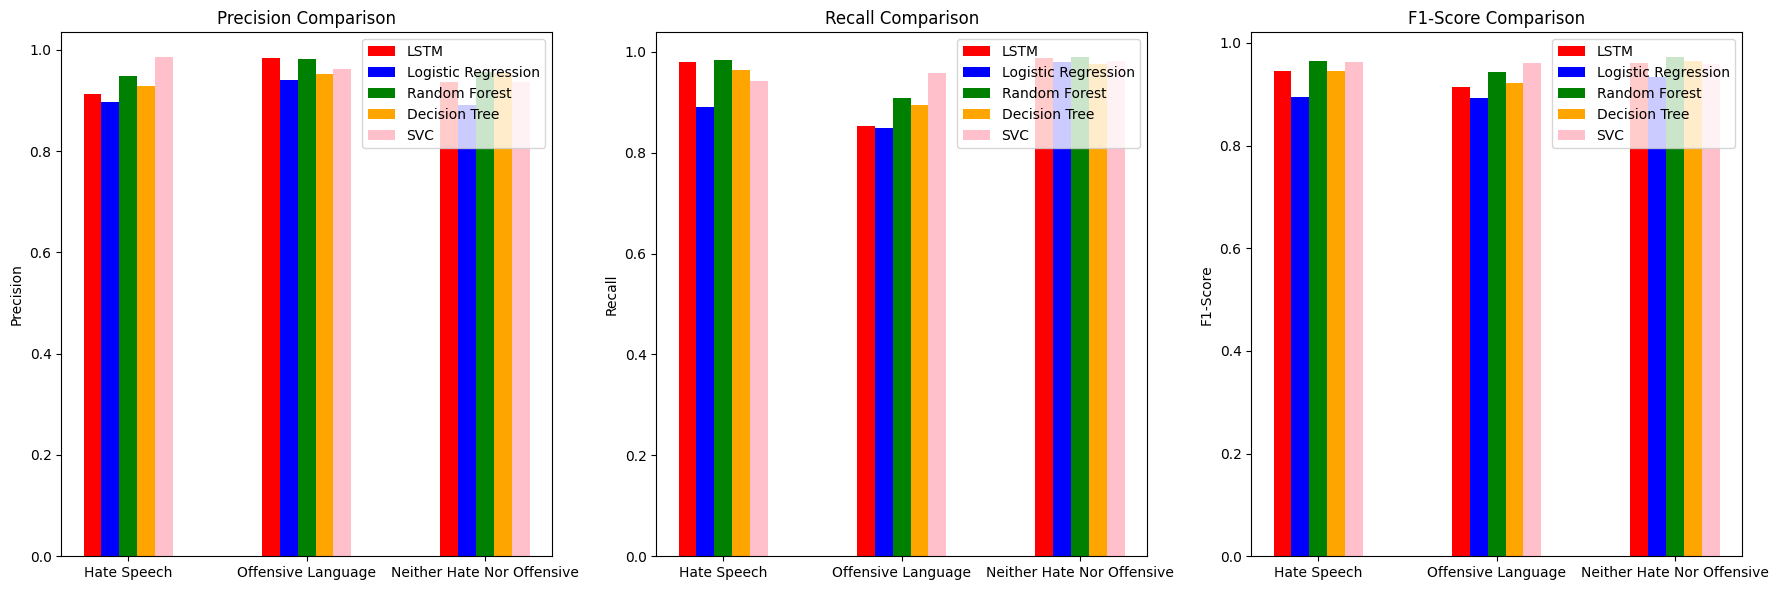

In [125]:
labels = ["Hate Speech", "Offensive Language", "Neither Hate Nor Offensive"]
bar_width = 0.1
x = np.arange(len(labels))
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(x - 2 * bar_width, precision_lstm, width=bar_width, label='LSTM', color='red')
axes[0].bar(x - bar_width, precision_log, width=bar_width, label='Logistic Regression', color='blue')
axes[0].bar(x, precision_rf, width=bar_width, label='Random Forest', color='green')
axes[0].bar(x + bar_width, precision_dt, width=bar_width, label='Decision Tree', color='orange')
axes[0].bar(x + 2 * bar_width, precision_svc, width=bar_width, label='SVC', color='pink')
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].legend()

axes[1].bar(x - 2 * bar_width, recall_lstm, width=bar_width, label='LSTM', color='red')
axes[1].bar(x - bar_width, recall_log, width=bar_width, label='Logistic Regression', color='blue')
axes[1].bar(x, recall_rf, width=bar_width, label='Random Forest', color='green')
axes[1].bar(x + bar_width, recall_dt, width=bar_width, label='Decision Tree', color='orange')
axes[1].bar(x + 2 * bar_width, recall_svc, width=bar_width, label='SVC', color='pink')
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].legend()

axes[2].bar(x - 2 * bar_width, f1_lstm, width=bar_width, label='LSTM', color='red')
axes[2].bar(x - bar_width, f1_log, width=bar_width, label='Logistic Regression', color='blue')
axes[2].bar(x, f1_rf, width=bar_width, label='Random Forest', color='green')
axes[2].bar(x + bar_width, f1_dt, width=bar_width, label='Decision Tree', color='orange')
axes[2].bar(x + 2 * bar_width, f1_svc, width=bar_width, label='SVC', color='pink')
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')
axes[2].set_xticks(x)
axes[2].set_xticklabels(labels)
axes[2].legend()

plt.tight_layout()
plt.show()

All models have precision, recall, f1 score > 90

Plotting ROC Curves as subplots

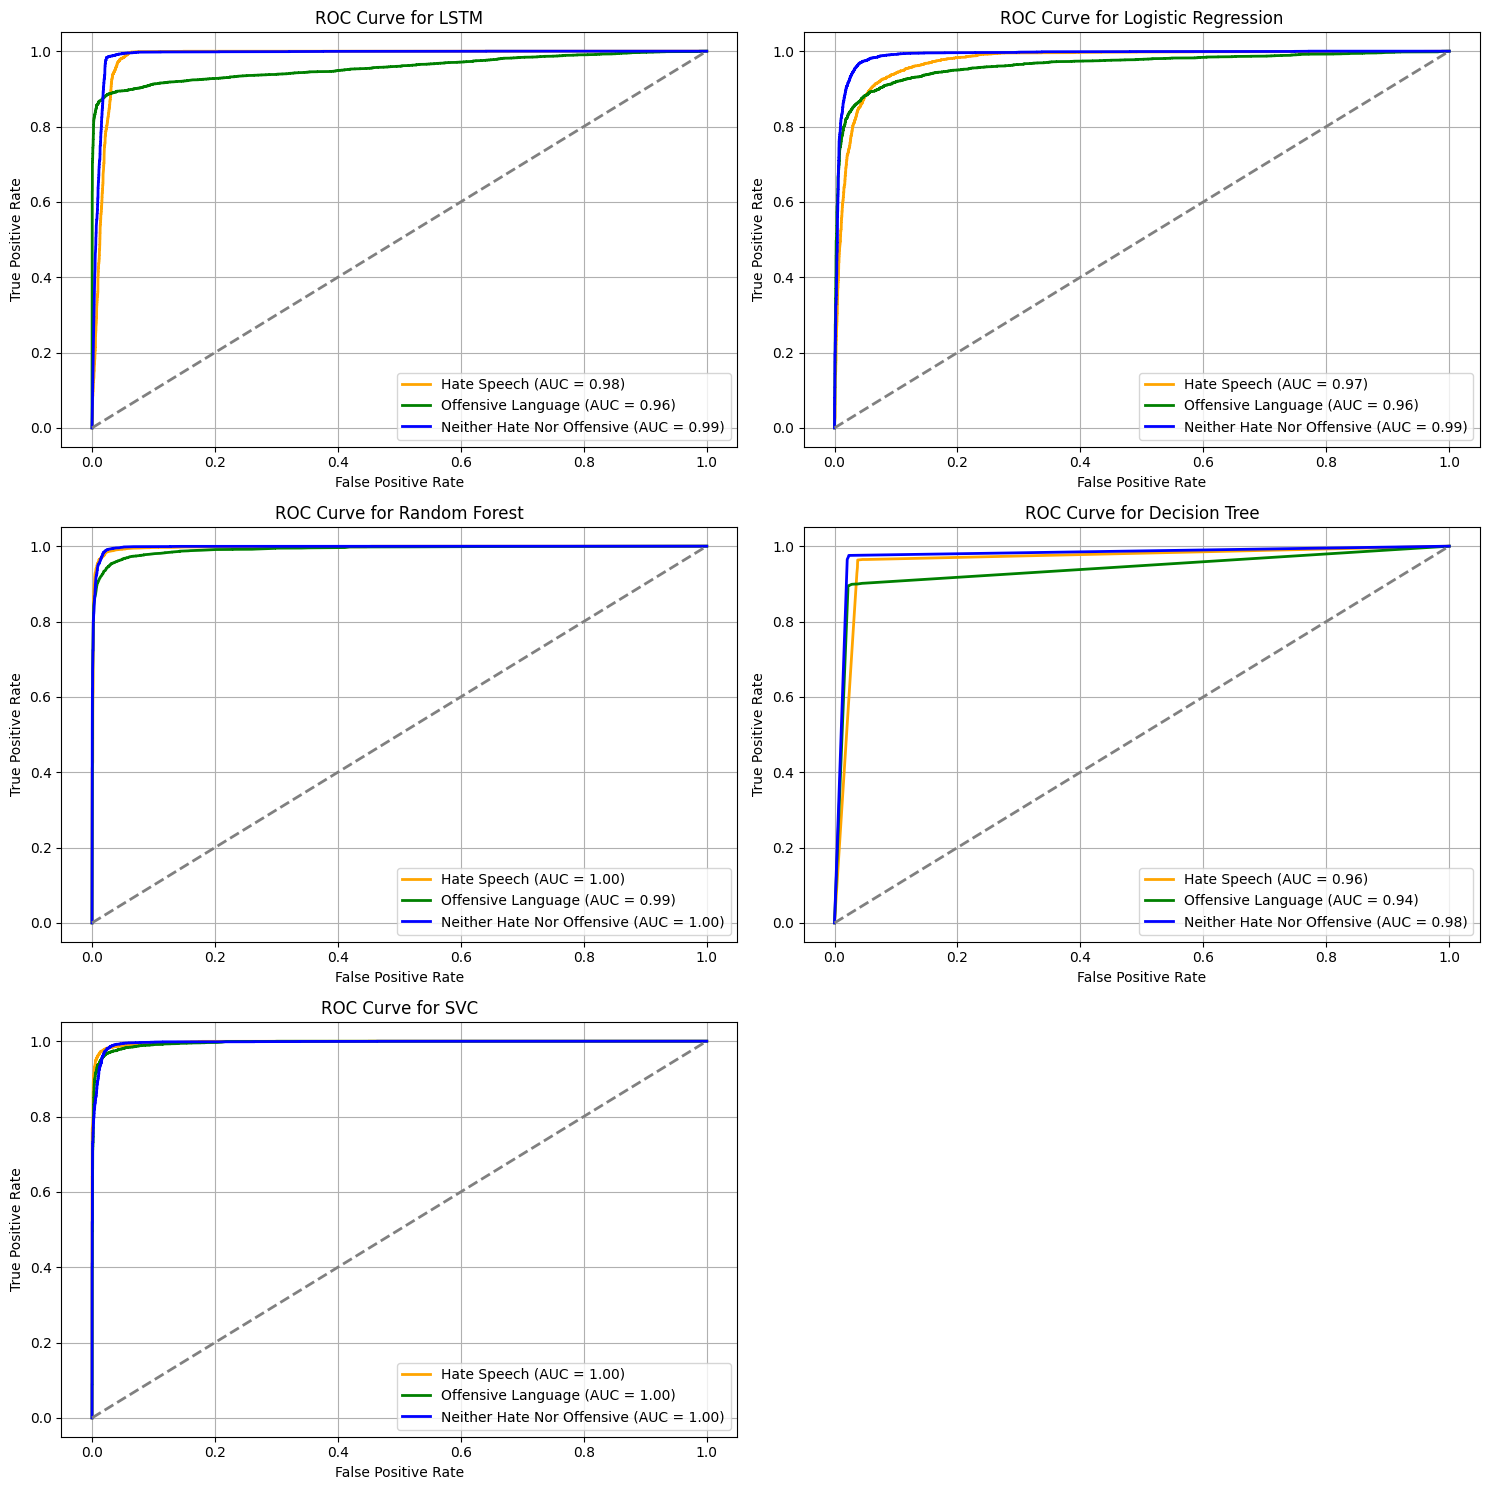

In [127]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes[0, 0].plot(fpr_lstm_hs, tpr_lstm_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_lstm_hs)
axes[0, 0].plot(fpr_lstm_ol, tpr_lstm_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_lstm_ol)
axes[0, 0].plot(fpr_lstm_nr, tpr_lstm_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_lstm_nr)
axes[0, 0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[0, 0].set_title('ROC Curve for LSTM')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(True)

axes[0, 1].plot(fpr_log_hs, tpr_log_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_log_hs)
axes[0, 1].plot(fpr_log_ol, tpr_log_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_log_ol)
axes[0, 1].plot(fpr_log_nr, tpr_log_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_log_nr)
axes[0, 1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[0, 1].set_title('ROC Curve for Logistic Regression')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True)

axes[1, 0].plot(fpr_rf_hs, tpr_rf_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_rf_hs)
axes[1, 0].plot(fpr_rf_ol, tpr_rf_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_rf_ol)
axes[1, 0].plot(fpr_rf_nr, tpr_rf_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_rf_nr)
axes[1, 0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[1, 0].set_title('ROC Curve for Random Forest')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True)

axes[1, 1].plot(fpr_dt_hs, tpr_dt_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_dt_hs)
axes[1, 1].plot(fpr_dt_ol, tpr_dt_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_dt_ol)
axes[1, 1].plot(fpr_dt_nr, tpr_dt_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_dt_nr)
axes[1, 1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[1, 1].set_title('ROC Curve for Decision Tree')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(True)

axes[2, 0].plot(fpr_svc_hs, tpr_svc_hs, color='orange', lw=2, label='Hate Speech (AUC = %0.2f)' % roc_auc_svc_hs)
axes[2, 0].plot(fpr_svc_ol, tpr_svc_ol, color='green', lw=2, label='Offensive Language (AUC = %0.2f)' % roc_auc_svc_ol)
axes[2, 0].plot(fpr_svc_nr, tpr_svc_nr, color='blue', lw=2, label='Neither Hate Nor Offensive (AUC = %0.2f)' % roc_auc_svc_nr)
axes[2, 0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[2, 0].set_title('ROC Curve for SVC')
axes[2, 0].set_xlabel('False Positive Rate')
axes[2, 0].set_ylabel('True Positive Rate')
axes[2, 0].legend(loc='lower right')
axes[2, 0].grid(True)

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

# **Conclusion**

In [128]:
# Data have only 6 columns so no need to perform PCA

In [129]:
# Data is imbalanced so performed upsampling the minority class using SMOTE and still i have used weights = balanced to make sure the model is not biased

In [130]:
# For all models the accuracy is above 90% so there is no need to tune the model

In [131]:
# All models performed very well across all classes, with high precision, recall, and F1-score.

In [132]:
# They have perfect AUC-ROC, meaning they are excellent at distinguishing between the classes, and the log loss is low, indicating the model's confidence in its predictions is well-calibrated.

In [133]:
# All models predicted almost correctly on testing the synthetic tweets. Where Logistic Regression Models is best among them.